#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**1-Basic Data Exploration**

* Identify the number of rows and columns in the dataset*

In [3]:
df.shape

(148654, 13)

*   determine the data types of each column



In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

*   check for missing values in each column.

In [5]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**As we see here,**

* As we see here, there are 49730 rows and 13 columns.
* ['Id'] column data type is int64, ['EmployeeName', 'JobTitle',' Agency'] and the rest is an object data type.
* all data in ['Notes', 'Status'] columns are nulls, 24.3% of ['Benefits'] are nulls, 0.4% of ['BasePay'] are nulls and  4 nulls for each of these ['OvertimePay', 'OtherPay'].



---



**2- Descriptive Statistics**



* Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.



In [6]:
# mean = sum of terms / number of terms
sum=0
for salary in df['TotalPay']:
  sum+=salary
mean = sum/df.shape[0]
mean

74768.321971703

In [7]:
#median
sorted_salary = sorted(df['TotalPay'])
#number of salaries data = 148654 (even) then :
n = len(df['TotalPay'])
median_salary = (sorted_salary[(n//2) + 1] + sorted_salary[(n//2)]) / 2
median_salary

71427.13

In [8]:
#the first element here is the mode (the most common number that appear) sience value_counts resulting Series in descending order
#so that the first element is the most frequentlyoccurring row.
# so its 538909.28
df['TotalPay'].value_counts

<bound method IndexOpsMixin.value_counts of 0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: TotalPay, Length: 148654, dtype: float64>

In [9]:
min = sorted_salary[0]
min

-618.13

In [10]:
# -618.13 must be a missing value so we will assum min = 0
min=0

In [11]:
max = sorted_salary[-1]
max

567595.43

In [12]:
range = max-min
range

567595.43

In [13]:
#std = square root ((summation(X-Mean)^2) / N )
sum=0
for salary in df['TotalPay']:
  sum+=np.power(salary-mean,2)
std = np.sqrt(sum/df['TotalPay'].shape[0])
std


50516.8353589452

**We could calculate of these calculations using describe function**


In [14]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64



---



**3- Data Cleaning**

* Handle missing data by suitable method with explain why you use it.

In [15]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [16]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [17]:
#Since we have ['TotalPayBenefits'] column, which is the total salary with benefits we can subtract it from ['TotalPay'] to get the Benefits
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'],inplace=True)


In [18]:
#['BasePay'] = ['TotalPay']-(['OtherPay']+['OvertimePay'])
df['BasePay'].fillna(df['TotalPay']-(df['OtherPay']+df['OvertimePay']),inplace=True)


In [19]:
# ['Notes'] and ['Status'] will be totally droped because full of nulls
df.drop(columns=['Notes','Status'],axis=1,inplace=True)

# i'll drop the 4 rows that contain nulls
df  = df.dropna()
df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64



---



**4- Basic Data Visualization**

* Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

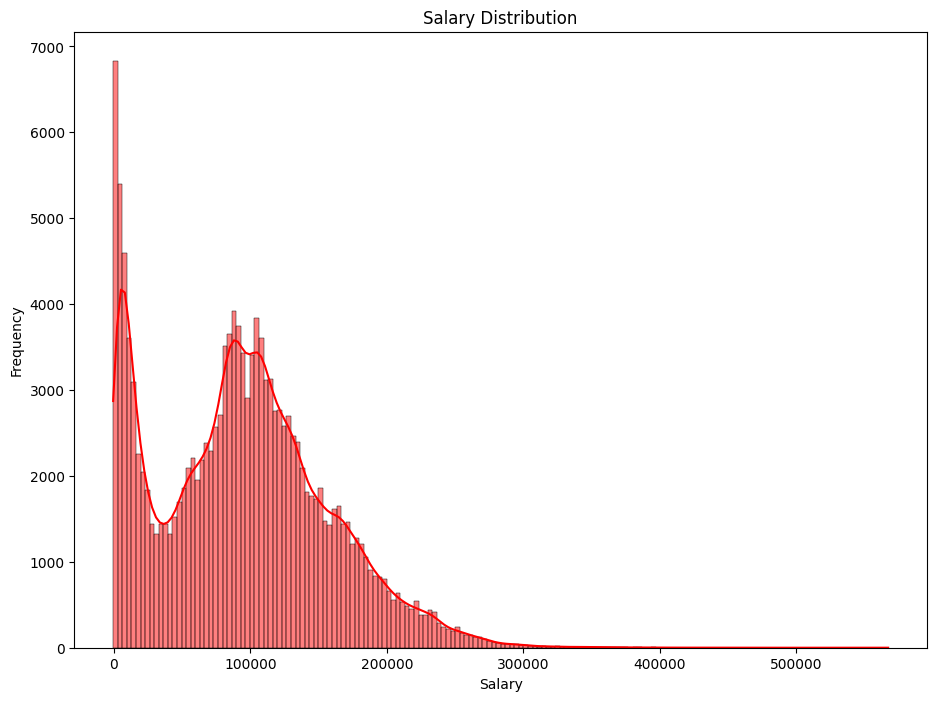

In [21]:
plt.figure(figsize=(11, 8))
sns.histplot(df['TotalPayBenefits'], color='red',kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [22]:
department_counts = df['JobTitle'].value_counts()
department_counts.shape

(2158,)

In [23]:
#its hard to visualize 2158 title so i'll take first 50
top_50_jobs = department_counts.head(50)
title = top_50_jobs.index
size =top_50_jobs.values

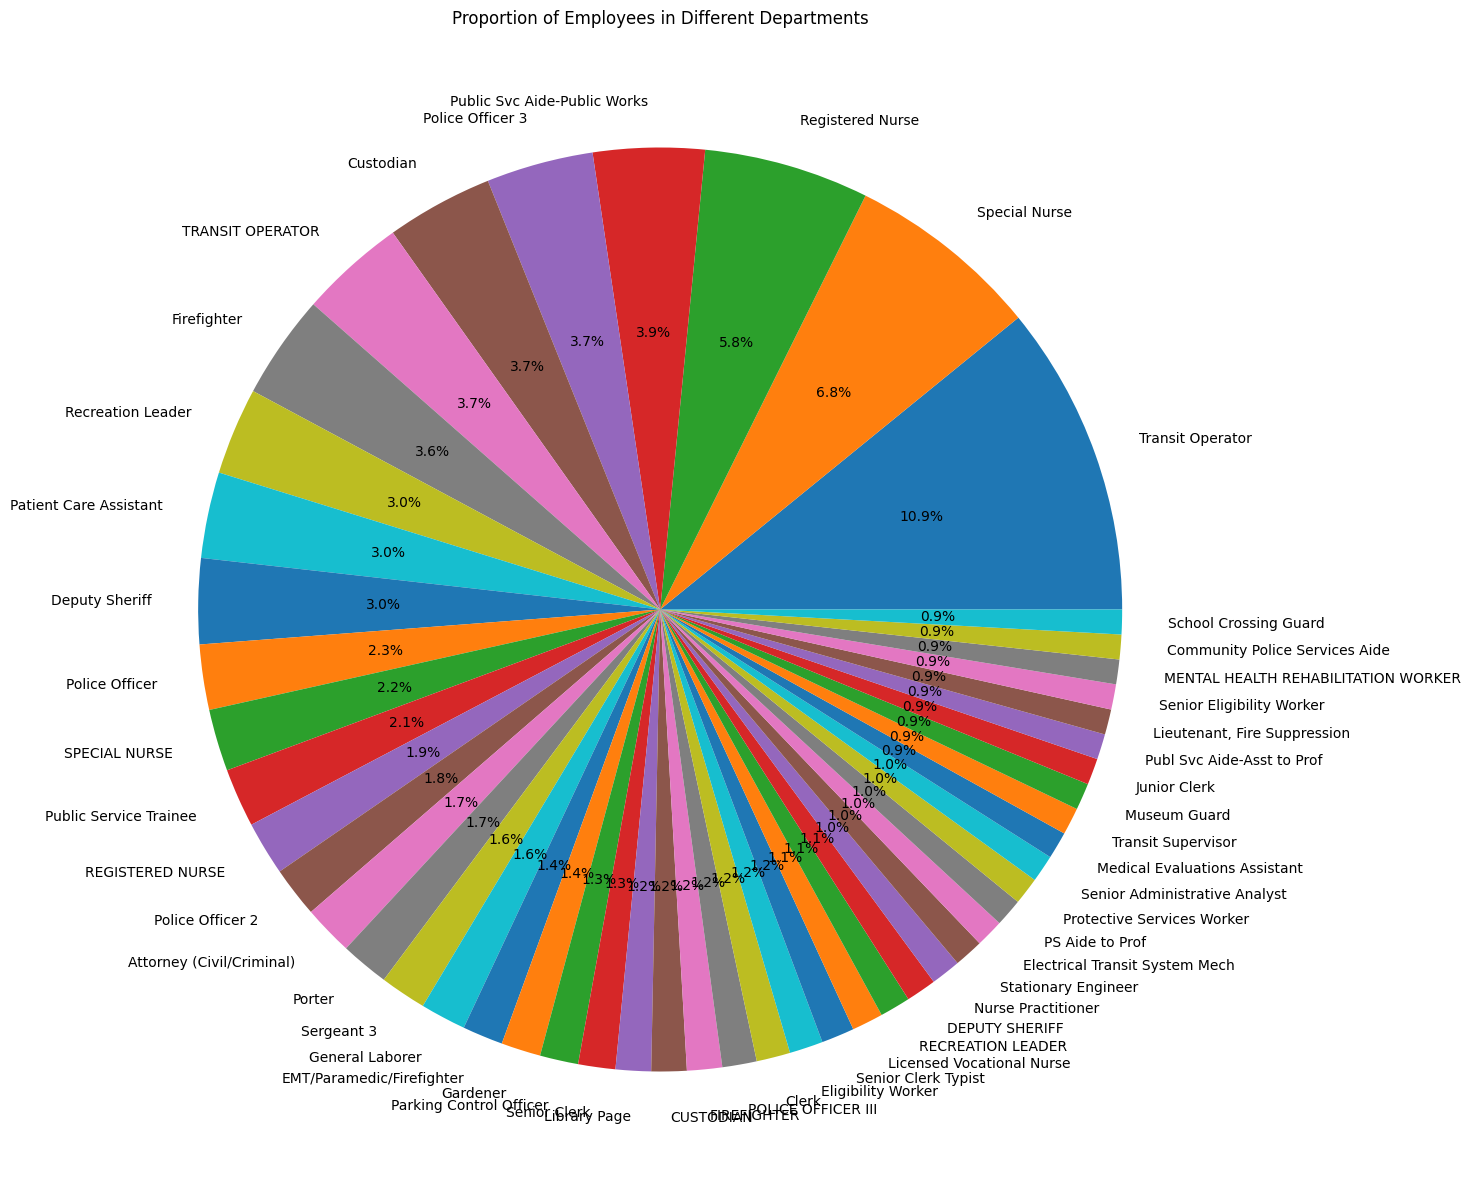

In [24]:
plt.figure(figsize=(15, 15))
plt.pie(size, labels=title, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()



---



**5- Grouped Analysis**

* Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

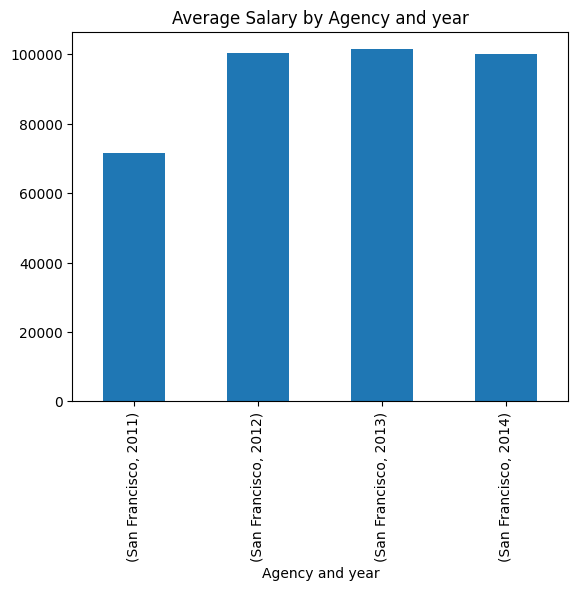

In [25]:
#showing how average salary changes by Agency and year
Agency_Year = df.groupby(['Agency','Year'])
Agency_Year_mean = Agency_Year['TotalPayBenefits'].mean()

Agency_Year_mean.plot(kind='bar', title='Average Salary by Agency and year')
plt.xlabel('Agency and year')
plt.show()




---



**6- Simple Correlation Analysis**

* Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [26]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


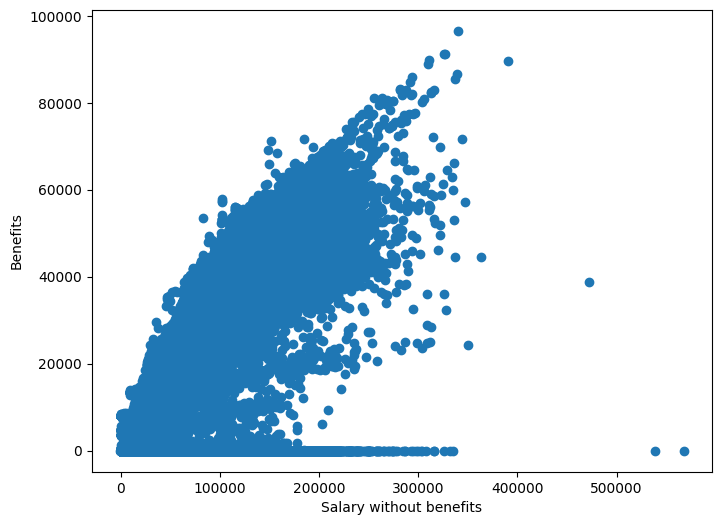

In [27]:
#Showing the correlation between total pay and benefits
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalPay'], df['Benefits'])
plt.xlabel('Salary without benefits')
plt.ylabel('Benefits')
plt.show()



---



# Good Luck!